## Decision Tree Classification in Python

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning.
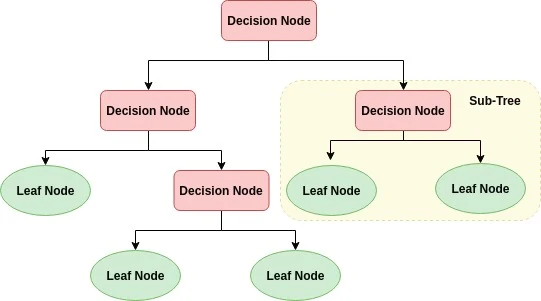

## How does the Decision Tree algorithm work?

The basic idea behind any decision tree algorithm is as:-

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
    All the tuples belong to the same attribute value.
    There are no more remaining attributes.
    There are no more instances.
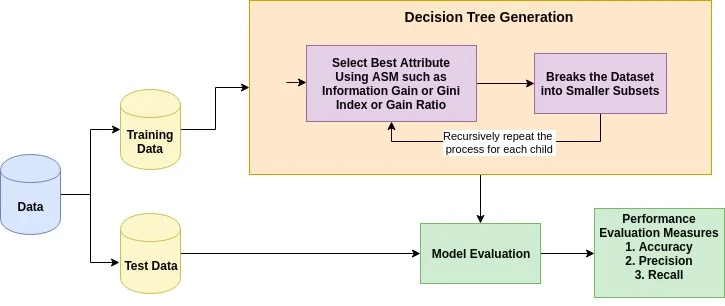

### Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

## Types of Decision Tree

### Regression Tree

A regression tree is used when the dependent variable is continuous. The value obtained by leaf nodes in the training data is the mean response of observation falling in that region. Thus, if an unseen data observation falls in that region, its prediction is made with the mean value. This means that even if the dependent variable in training data was continuous, it will only take discrete values in the test set. A regression tree follows a top-down greedy approach.

### Classification Tree

A classification tree is used when the dependent variable is categorical. The value obtained by leaf nodes in the training data is the mode response of observation falling in that region It follows a top-down greedy approach.

Together they are called as CART(classification and regression tree)

#### Gini index

Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.
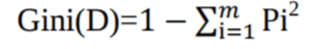
Where, pi is the probability that a tuple in D belongs to class Ci.

Gini says, if we select two items from a population at random then they must be of the same class and the probability for this is 1 if the population is pure.

1. It works with the categorical target variable “Success” or “Failure”.
2. It performs only Binary splits
3. Higher the value of Gini higher the homogeneity.
4. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini impurity for a split

1. Calculate Gini impurity for sub-nodes, using the formula subtracting the sum of the square of probability for success and failure from one.
    1-(p²+q²)
    where p =P(Success) & q=P(Failure)
2. Calculate Gini for split using the weighted Gini score of each node of that split
3. Select the feature with the least Gini impurity for the split.

### Information Gain

A less impure node requires less information to describe it and, a more impure node requires more information. Information theory is a measure to define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is equally divided (50% — 50%), it has an entropy of one. Entropy is calculated as follows.
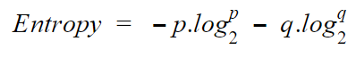

Steps to calculate entropy for a split:

1. Calculate the entropy of the parent node
2. Calculate entropy of each individual node of split and calculate the weighted average of all sub-nodes available in the split. The lesser the entropy, the better it is.
3. calculate information gain as follows and chose the node with the highest information gain for splitting
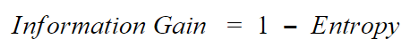

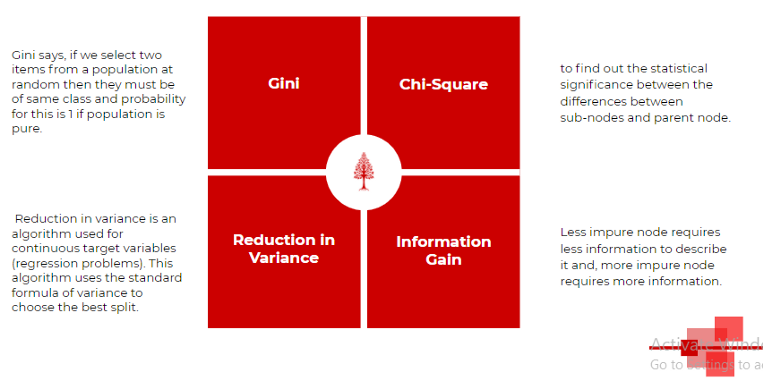

## Optimizing Decision Tree Performance

1. criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

2. splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

3. max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

Pros
1. Decision trees are easy to interpret and visualize.
2. It can easily capture Non-linear patterns.
3. It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
4. It can be used for feature engineering such as predicting missing values, suitable for variable selection.
5. The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

Cons
1. Sensitive to noisy data. It can overfit noisy data.
2. The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
3. Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

#### Advantages of a decision tree

1. Easy to visualize and interpret:
2. Useful in data exploration:
3. Less data cleaning required
4. The data type is not a constraint: It can handle both categorical and numerical data.

#### Disadvantages of decision tree

1. Overfitting: single decision tree tends to overfit the data which is solved by setting constraints on model parameters 
2. Not exact fit for continuous data: It losses some of the information associated with numerical variables when it classifies them into different categories.

#### Pruning

Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.


## Importing the Required Libraries and Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
company_data= pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Working Problem

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

     Sales -- Unit sales (in thousands) at each location
     Competitor Price -- Price charged by competitor at each location
     Income -- Community income level (in thousands of dollars)
     Advertising -- Local advertising budget for company at each location (in thousands of dollars)
     Population -- Population size in region (in thousands)
     Price -- Price company charges for car seats at each site
     Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
     Age -- Average age of the local population
     Education -- Education level at each location
     Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
     US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [3]:
company_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company_data.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

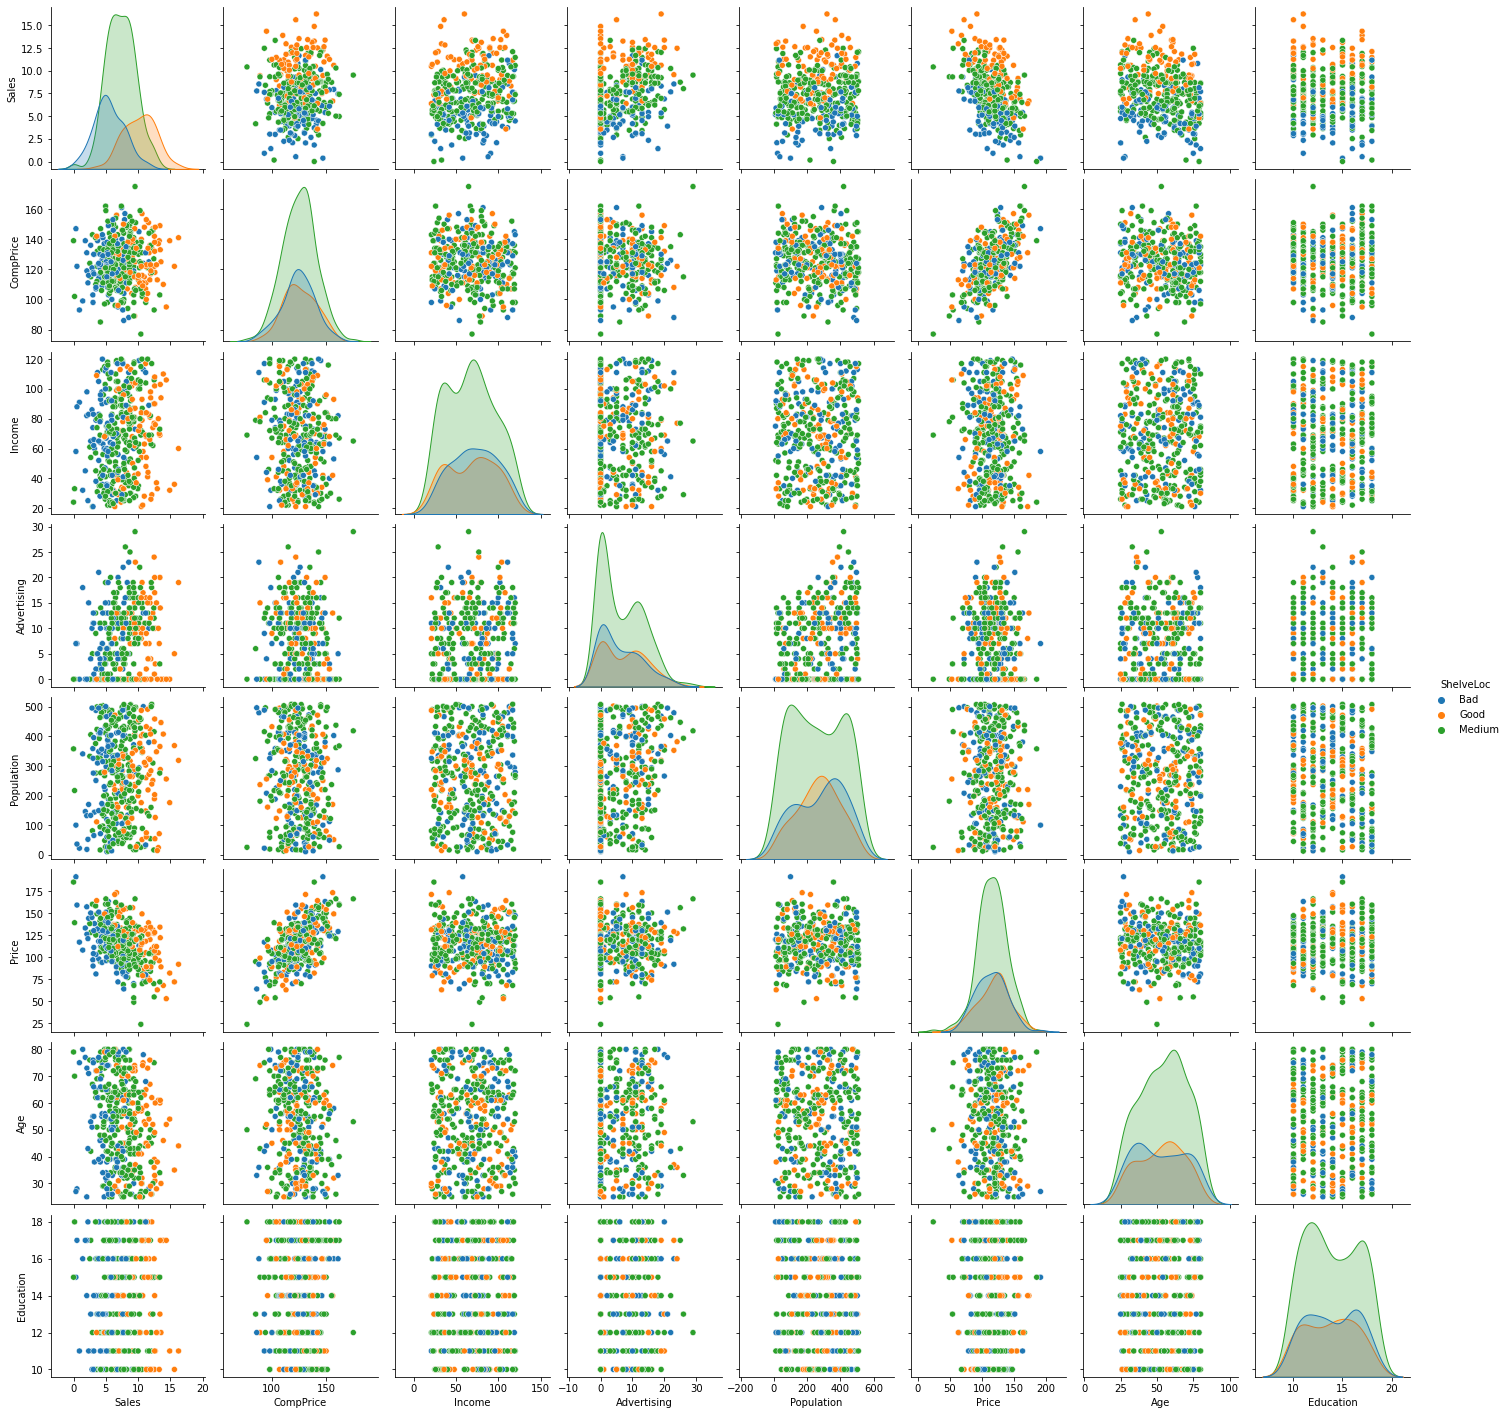

In [6]:
sns.pairplot(data=company_data,hue='ShelveLoc')

We have total of 3 segment for the sale that we want to predict: Bad, Good & Medium. The scatter plot for the dataset are to much jumbled up.

<AxesSubplot:>

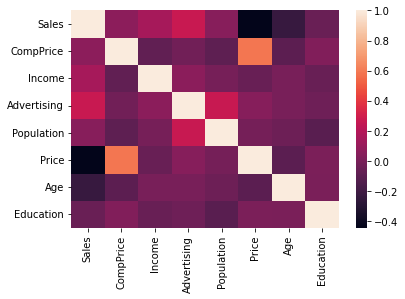

In [7]:
sns.heatmap(company_data.corr())

We can observe from the above two graph:
1. Price and Sales are negatively corelated with each other.
2. CompPrice is highly related to company Price charge for the car seat.

In [8]:
print(*list(company_data.Urban.unique()))

Yes No


In [9]:
print(*list(company_data.US.unique()))

Yes No


In [10]:
print(*list(company_data.ShelveLoc.unique()))

Bad Good Medium


In [11]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
duplicate= company_data[company_data.duplicated()]
duplicate

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<AxesSubplot:xlabel='Sales'>

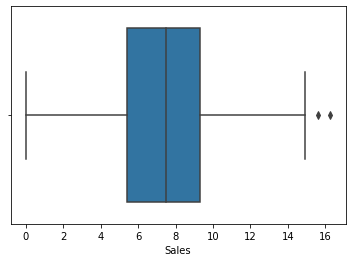

In [13]:
sns.boxplot(company_data.Sales)

<AxesSubplot:xlabel='CompPrice'>

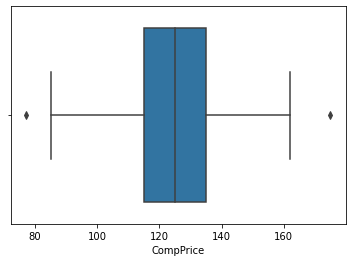

In [14]:
sns.boxplot(company_data.CompPrice)

<AxesSubplot:xlabel='Income'>

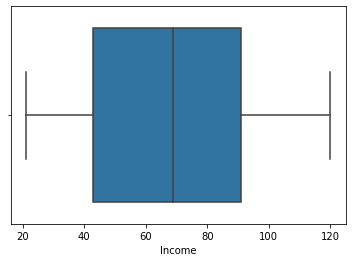

In [15]:
sns.boxplot(company_data.Income)

<AxesSubplot:xlabel='Advertising'>

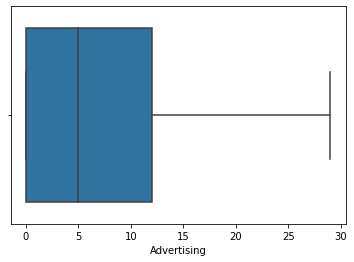

In [16]:
sns.boxplot(company_data.Advertising)

<AxesSubplot:xlabel='Population'>

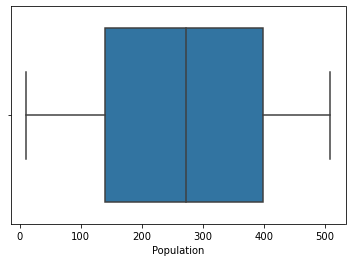

In [17]:
sns.boxplot(company_data.Population)

<AxesSubplot:xlabel='Price'>

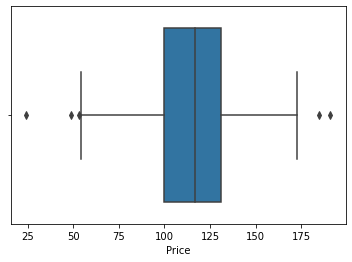

In [18]:
sns.boxplot(company_data.Price)

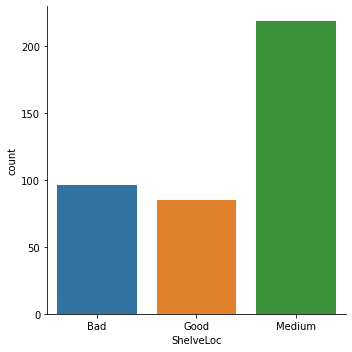

In [19]:
sns.factorplot('ShelveLoc',data=company_data,kind='count')

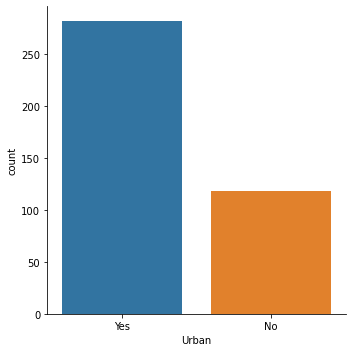

In [20]:
sns.factorplot('Urban',data=company_data,kind='count')

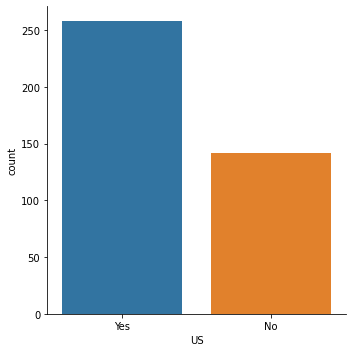

In [21]:
sns.factorplot('US',data=company_data,kind='count')

In [22]:
company_data.shape

(400, 11)

In [23]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

## Label Encoding

In [24]:
labelEncoder= LabelEncoder()
company_data['ShelveLoc']= labelEncoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban']= labelEncoder.fit_transform(company_data['Urban'])
company_data['US']= labelEncoder.fit_transform(company_data['US'])

In [25]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


## Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [26]:
#split dataset in features and target variable
feature_cols= ['Sales','CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age', 'Education', 'Urban', 'US']
X= company_data[feature_cols] #feature
y= company_data.ShelveLoc

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [27]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,random_state=0 )

In [28]:
company_data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [29]:
company_data.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [30]:
company_data.US.value_counts()

1    258
0    142
Name: US, dtype: int64

In [31]:
print("Testing split input- ", X_test.shape)
print("Training split input- ", X_train.shape)

Testing split input-  (120, 10)
Training split input-  (280, 10)


## Building Decision Tree Classifier using Entropy Criteria

In [32]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
# Train Decision Tree Classifer
model.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [33]:
# Predicting the values of test data
y_pred = model.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.40      0.24      0.30        25
           1       0.68      0.48      0.57        31
           2       0.60      0.78      0.68        64

    accuracy                           0.59       120
   macro avg       0.56      0.50      0.52       120
weighted avg       0.58      0.59      0.57       120



We got an accuracy of 59% on the testing dataset of 120 records.

In [34]:
pd.crosstab(y_test,y_pred)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,6,2,17
1,0,15,16
2,9,5,50


In [35]:
# Accuracy 
np.mean(y_pred==y_test)

0.5916666666666667

Text(0.5, 1.0, 'Accuracy Score: 0.5916666666666667')

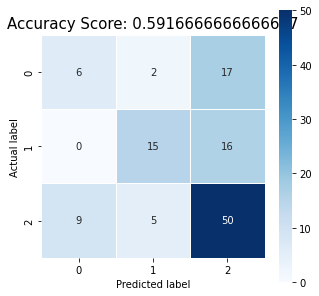

In [36]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5, annot=True, square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Visualizing the decision tree

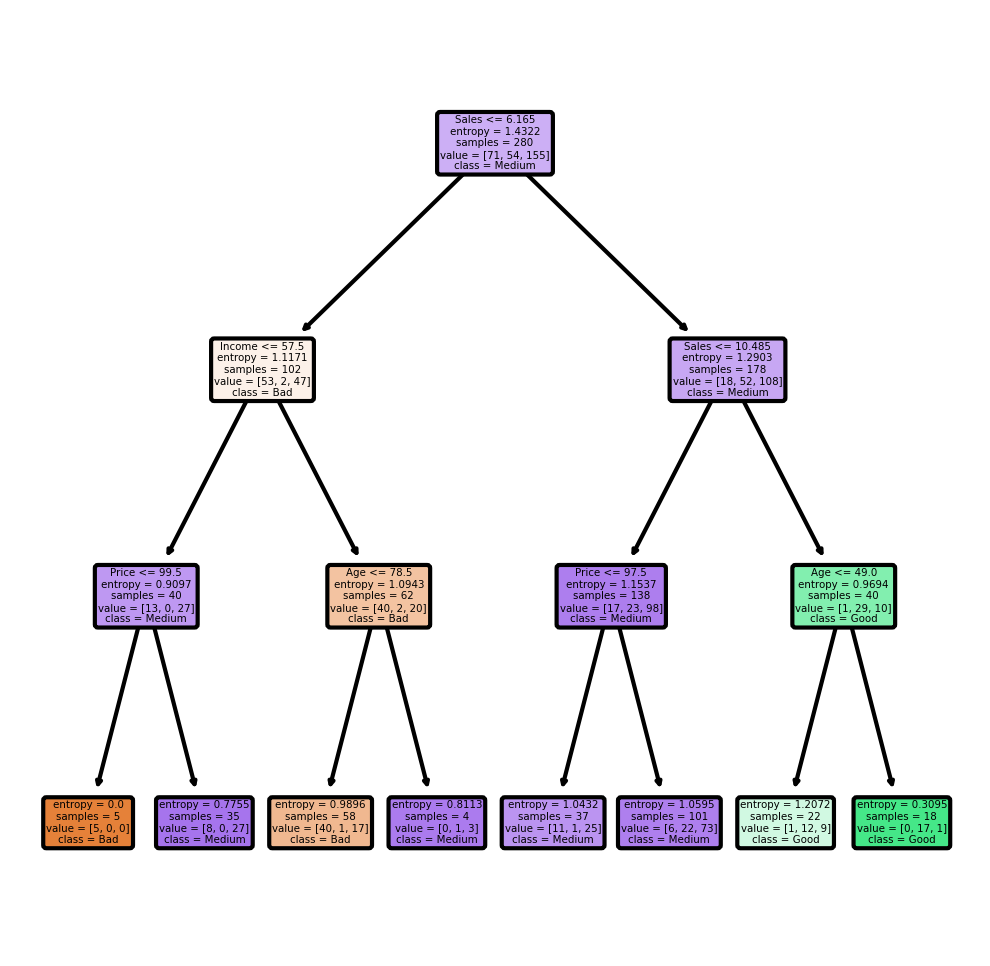

In [37]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
dec_tree = plot_tree(decision_tree=model, feature_names = X.columns, 
                     class_names =["Bad", "Good", "Medium"] , filled = True , precision = 4, rounded = True)

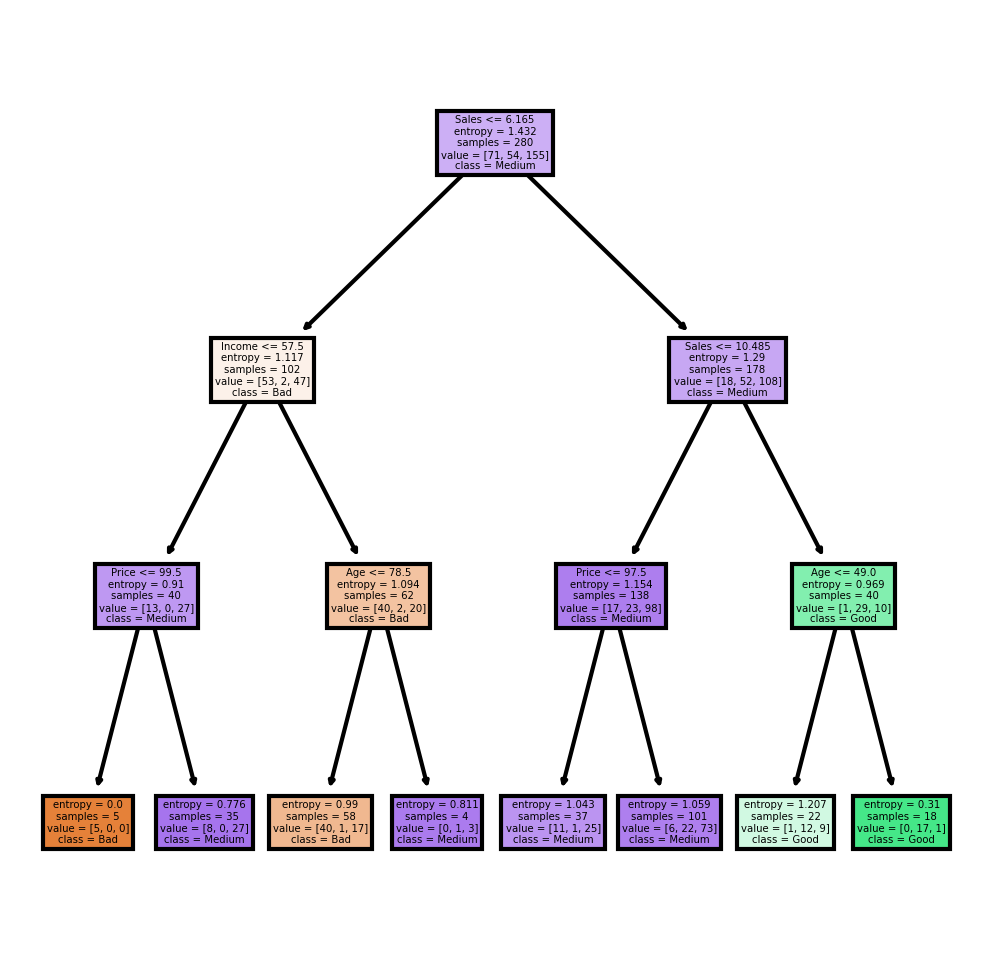

In [38]:
fn=['Sales','CompPrice','Income','Advertising', 'Population', 'Price',
       'Age', 'Education', 'Urban', 'US']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

We can see how the tree is split, what are the entropy for the nodes, the records in those nodes, and their labels.

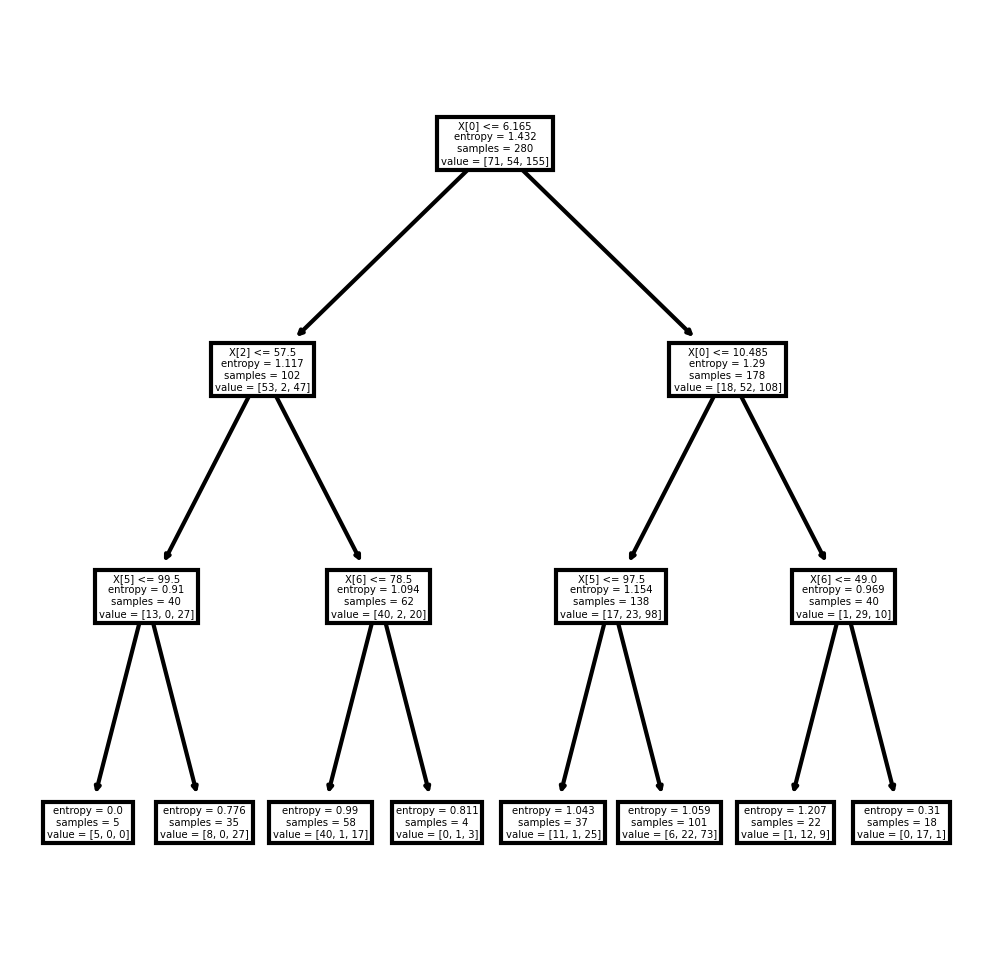

In [39]:
#PLot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model);

In [40]:
model.feature_importances_ 

array([0.65750124, 0.        , 0.07165518, 0.        , 0.        ,
       0.1686422 , 0.10220138, 0.        , 0.        , 0.        ])

In [41]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Sales          0.657501
Price          0.168642
Age            0.102201
Income         0.071655
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

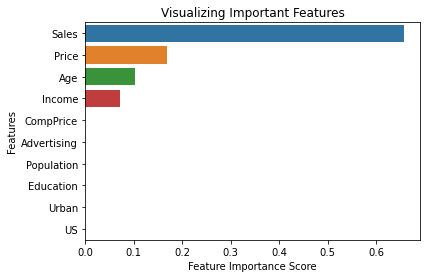

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [43]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

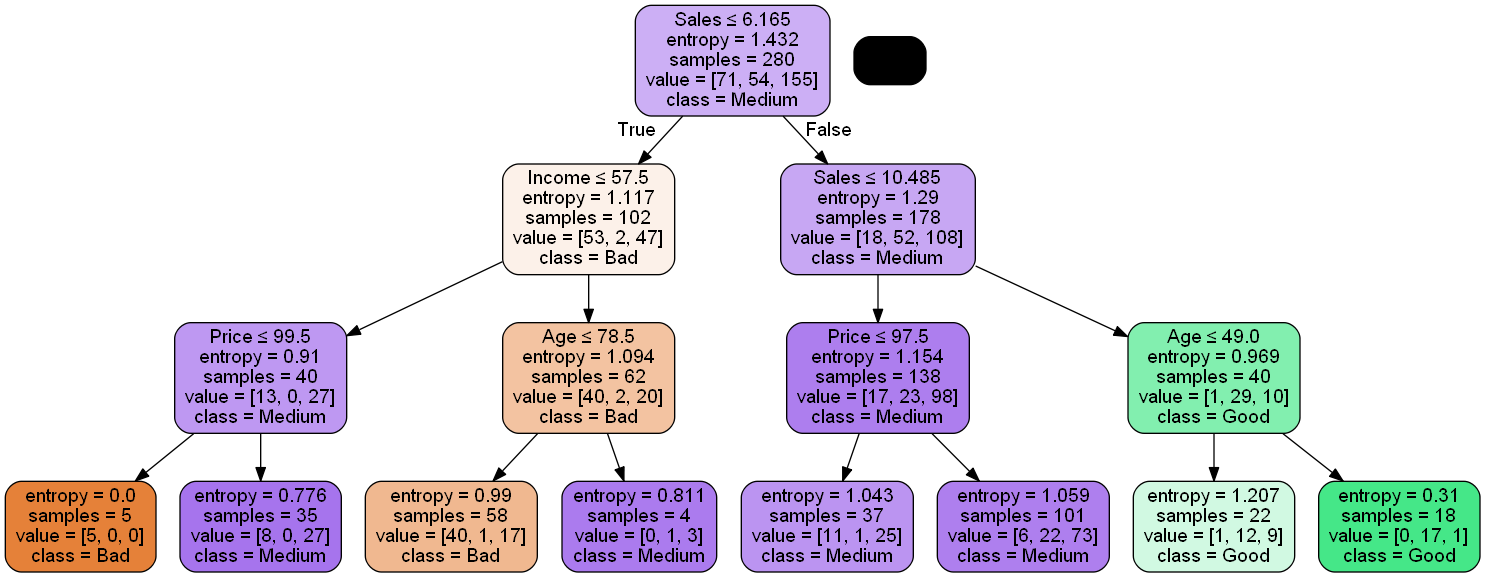

In [44]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = fn,class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Building Decision Tree Classifier using Gini Criteria

In [45]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
# Train Decision Tree Classifer
model_gini.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [46]:
# Predicting the values of test data
y_pred_gini = model_gini.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred_gini))

Classification report - 
               precision    recall  f1-score   support

           0       0.46      0.24      0.32        25
           1       0.61      0.55      0.58        31
           2       0.61      0.75      0.67        64

    accuracy                           0.59       120
   macro avg       0.56      0.51      0.52       120
weighted avg       0.58      0.59      0.57       120



In [47]:
pd.crosstab(y_test,y_pred_gini)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,6,2,17
1,0,17,14
2,7,9,48


Text(0.5, 1.0, 'Accuracy Score: 0.5916666666666667')

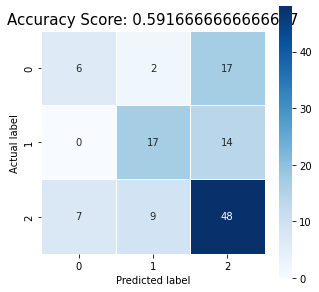

In [48]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5, annot=True, square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model_gini.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [49]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

Accuracy: 0.5916666666666667


## Visualizing the decision tree

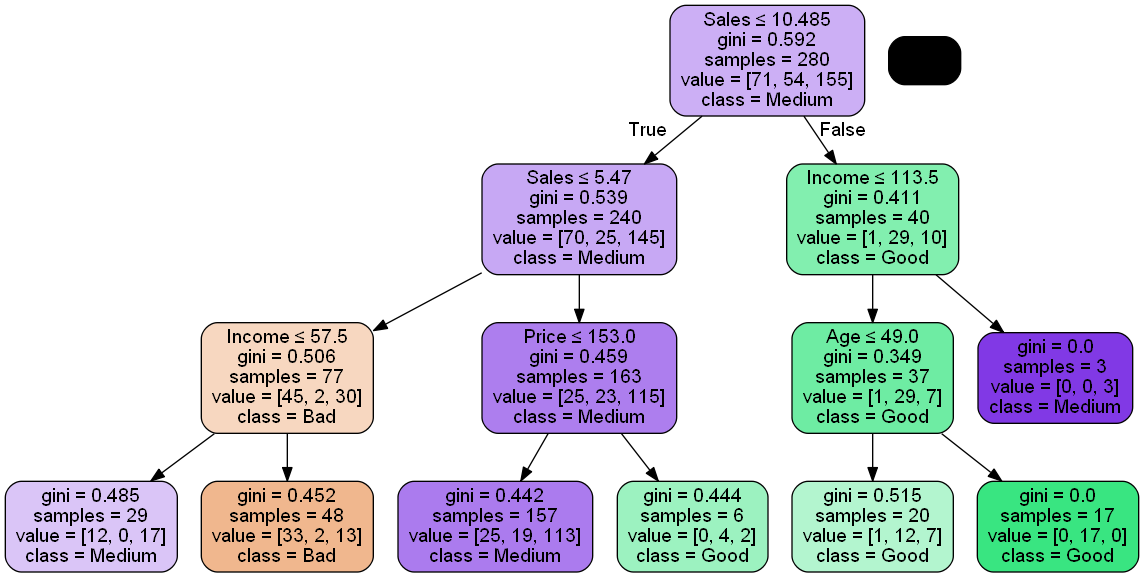

In [50]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = fn,class_names=cn)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [51]:
import pandas as pd
feature_imp = pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Sales          0.746804
Income         0.140931
Price          0.057299
Age            0.054966
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

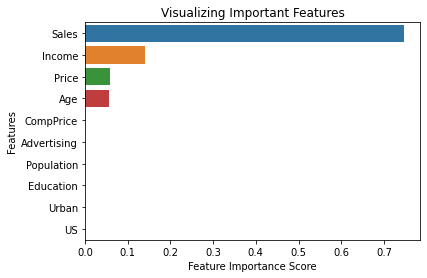

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

!pip sudo apt-get install graphviz

!pip install graphviz

!pip install pydotplus

conda install python-graphviz